<AxesSubplot:>

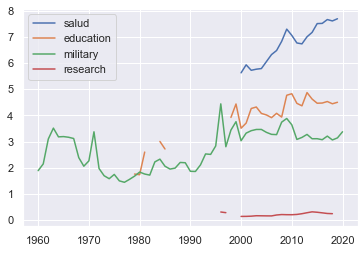

In [226]:
import numpy as np
from utils import momento
import pandas as pd


data_path = './datos/education.csv'
files = ['salud', 'education', 'military', 'research']

data = []

max = 0

for file in files:

    data_path = f"./datos/{file}.csv"
    df = pd.read_csv(data_path, delimiter=",")
    dates = df.columns[ list(range(4, 65))]

    df = df.loc[df['Country Code'] == 'COL']
    values = df.values[0, list(range(4, 65))]
    data.append(values)

data = np.array(data).T
data = np.float32(data)
dt = pd.DataFrame(data=data, columns=files)
dt = dt.set_index(dates)
dt.plot()

Tomamos los datos del periodo de los ultimos 15 años

2006


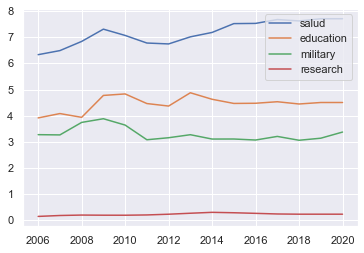

In [227]:
offset = -15
print(dates[offset])
dt2 = dt[offset:]
dt2 = dt2.interpolate(method='linear')
dt2.plot()
dates = dates[offset:]

(a) Calcule la matriz de covarianza y la matriz de correlación entre estos parametros

In [228]:
y = np.array(dates, dtype=np.float32)[..., None]
_input = np.array(dt2.values)
momento2 = momento( y, _input, n=2) 
convariance_matrix =  momento2 / y.shape[0]

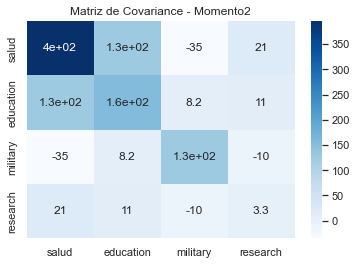

In [229]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme()

sns.heatmap(convariance_matrix,
        xticklabels=files,
        yticklabels=files, cmap="Blues", annot=True)
plt.title("Matriz de Covariance - Momento2")
plt.show()


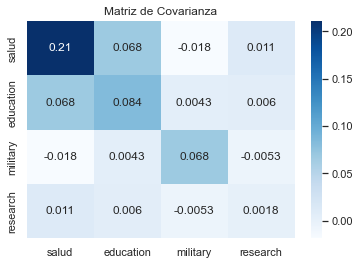

In [230]:
corr = dt2.cov()

plt.title('Matriz de Covarianza')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Blues", annot=True)
plt.show()

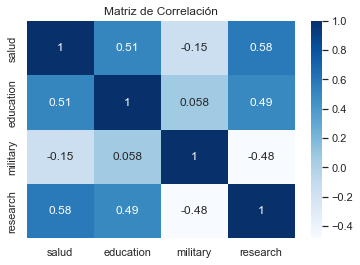

In [231]:
corr = dt2.corr()

plt.title('Matriz de Correlación')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Blues", annot=True)
plt.show()

(b) Para la matriz de covarianza, en este espacio de parámetros, queremos encontrar sus autovalores y autovectores. Discuta el significado de los autovalores y autovectores de esta matríz.

In [232]:
w, v = np.linalg.eig(convariance_matrix)

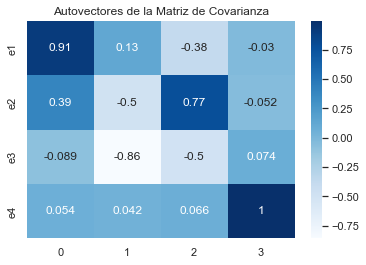

In [233]:
plt.title("Autovectores de la Matriz de Covarianza")
sns.heatmap(v,
 xticklabels=['0', '1', '2', '3'],
 yticklabels=['e1', 'e2', 'e3', 'e4'],
 cmap="Blues", annot=True)

plt.show()

(c) Encuentre la matriz de transformación que nos lleva de la matriz en la base original a la representaci´on de la matriz en la base de autovalores y autovectores.

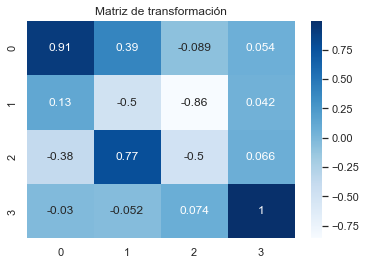

In [234]:
transform_matrix = v.T

plt.title("Matriz de transformación")
sns.heatmap(transform_matrix,
 cmap="Blues", annot=True)
plt.show()

In [235]:
new_basis = transform_matrix @ _input.T

In [236]:
new_basis.shape

(4, 15)

C:\Users\braya\AppData\Local\Temp\ipykernel_18672\2609386214.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc)


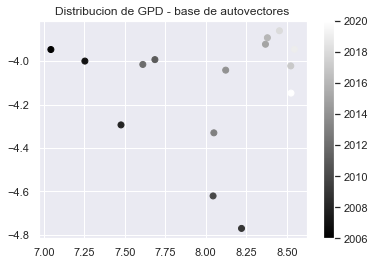

In [237]:
sc = plt.scatter(new_basis[0], new_basis[1], c=y, cmap='gray')
plt.title("Distribucion de GPD - base de autovectores")
plt.colorbar(sc)
plt.show()